In [1]:
import torch
from torch import nn, Tensor
from torch.nn import functional as F
from sklearn.preprocessing import StandardScaler, RobustScaler
import numpy as np
import matplotlib.pyplot as plt

import dataset
import models

from tqdm.notebook import tqdm

CASE1 = 'C:/Workspace/CPA/data/test'
CASE2 = 'C:/Workspace/CPA/data/method1'
CASE3 = 'C:/Workspace/CPA/data/method4/test'
CASE4 = 'C:/Workspace/CPA/data/method2/test'

### Visualize Function

In [11]:
def visualize(net, data_dir, title=None):
    test = dataset.TraceDataset(data_dir, trace_size=35000, scaler=RobustScaler())

    trace_cnt = len(test)//256

    fig = plt.figure(figsize=[11, 10])
    ax = fig.add_subplot(projection='3d')

    for key in tqdm(range(256)):
        #plt.title(f'Estimated Key Prob Distribution for Key({key}), Trace Count({trace_cnt})')

        for i in range(trace_cnt):
            arr = test[256*i + key][0]
            arr = np.expand_dims(arr, 1)

            res = F.softmax(net(Tensor(arr)), dim=1).detach().numpy()

            ax.scatter(range(256), [key]*256, res, c=res, cmap='jet', alpha=1.0 / trace_cnt)

        #plt.axvline(x=key, c='r', label='Truth', alpha=0.5)
        #plt.legend()

    if title:
        ax.set_title(title)
    ax.set_xlabel('Estimated Key')
    ax.set_ylabel('Real Key')
    ax.set_zlabel('Probability')

    plt.show()

def visualize_sets(net, data_dirs, titles=None):
    fig = plt.figure(figsize=[11, 10])

    for idx, data_dir in enumerate(data_dirs):
        test = dataset.TraceDataset(data_dir, trace_size=35000, scaler=RobustScaler())

        trace_cnt = len(test)//256

        ax = fig.add_subplot(2, 2, idx + 1, projection='3d')

        for key in tqdm(range(256)):
            for i in range(trace_cnt):
                arr = test[256*i + key][0]
                arr = np.expand_dims(arr, 1)

                res = F.softmax(net(Tensor(arr)), dim=1).detach().numpy()

                ax.scatter(range(256), [key]*256, res, c=res, cmap='jet', alpha=1.0 / trace_cnt)

        if titles[idx] is not None:
            ax.set_title(titles[idx])
        ax.set_xlabel('Estimated Key')
        ax.set_ylabel('Real Key')
        ax.set_zlabel('Probability')

    plt.show()

### Visualize for Case 1

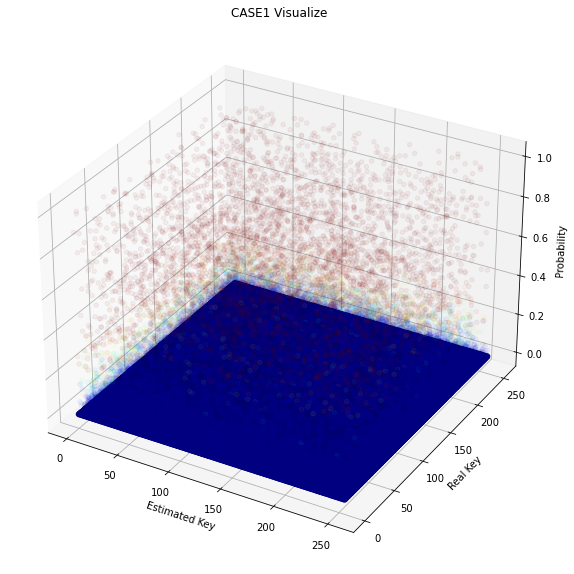

In [4]:
visualize(CASE1, 'CASE1 Visualize')


### Visualize for Case 2

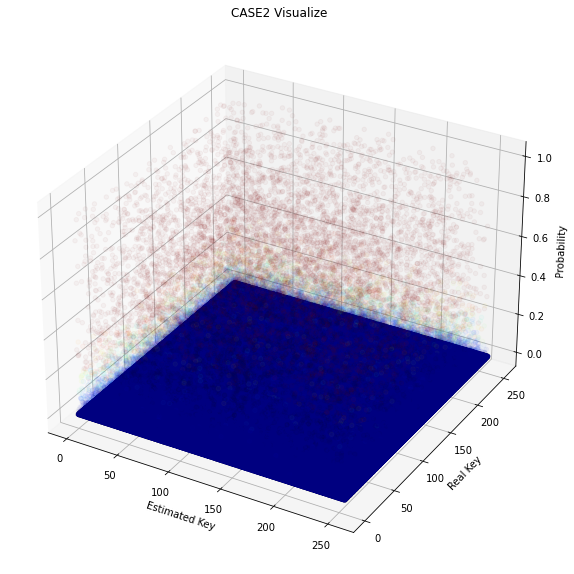

In [5]:
visualize(CASE2, 'CASE2 Visualize')

### Visualize for Case 3

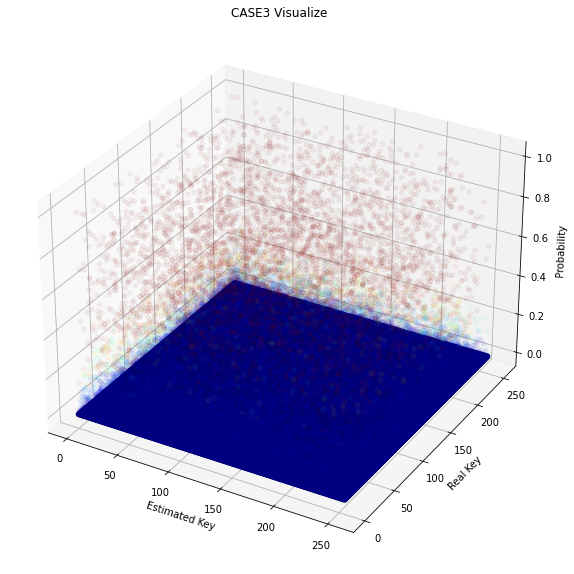

In [6]:
visualize(CASE3, 'CASE3 Visualize')

### Visualize for Case 4

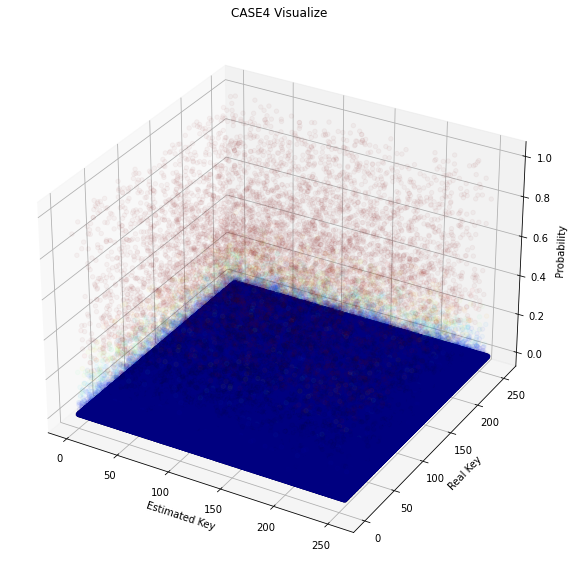

In [7]:
visualize(CASE4, 'CASE4 Visualize')

### Visualize for all

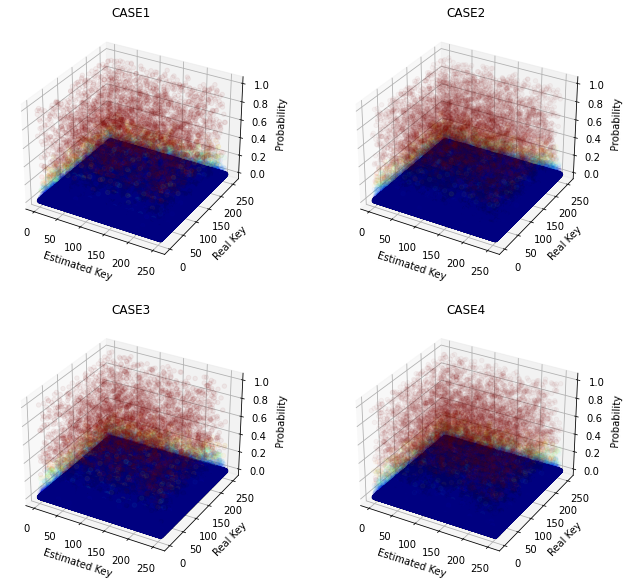

In [10]:
visualize_sets([CASE1, CASE2, CASE3, CASE4], ['CASE1', 'CASE2', 'CASE3', 'CASE4'])

In [12]:
model = models.CNNModel()
model.load_state_dict(torch.load('./model/CNNModel_case1_trained.params'))

<All keys matched successfully>

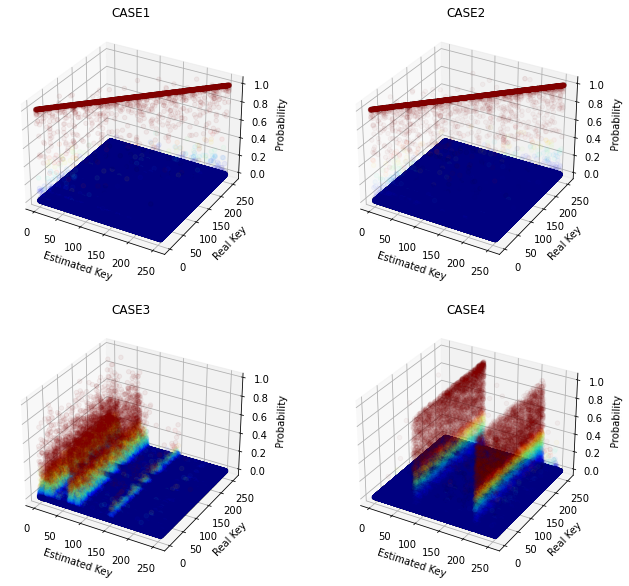

In [13]:
visualize_sets(model, [CASE1, CASE2, CASE3, CASE4], ['CASE1', 'CASE2', 'CASE3', 'CASE4'])